## Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
import warnings
sb.set() 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("cleaned-Housing.csv")
data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year
0,2012-01-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45,Improved,1986,250000.0,2012
1,2012-01-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44,Improved,1980,265000.0,2012
2,2012-01-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68,New Generation,1980,315000.0,2012
3,2012-01-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67,New Generation,1984,320000.0,2012
4,2012-01-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67,New Generation,1980,321000.0,2012


### Plotting box plot and bar plot for visualising flat_type, storey_range, flat_model against resale_price

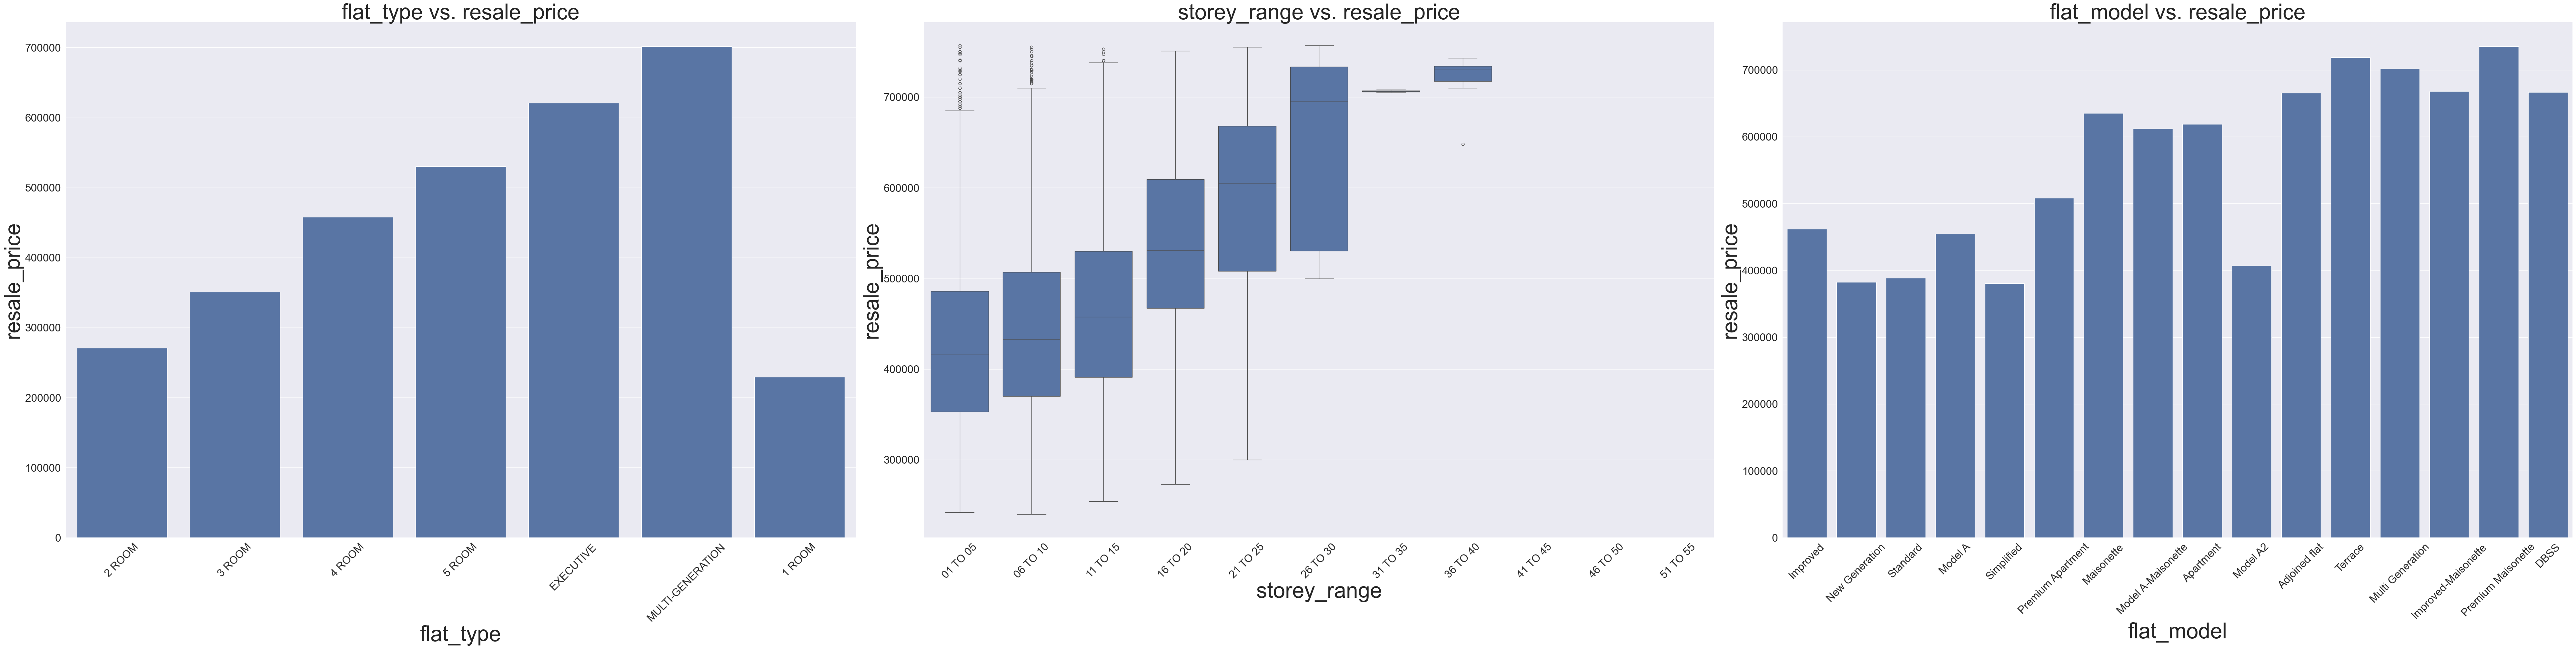

In [3]:
# Define the features and target variable
features = ['flat_type', 'storey_range', 'flat_model']
target = 'resale_price'

# Convert 'storey_range' to a categorical type with ordered categories
data['storey_range'] = pd.Categorical(data['storey_range'],
                                      categories=['01 TO 05', '06 TO 10', '11 TO 15', '16 TO 20', '21 TO 25', '26 TO 30', '31 TO 35', '36 TO 40', '41 TO 45', '46 TO 50', '51 TO 55'],
                                      ordered=True)

# Set figure size
plt.figure(figsize=(80, 56))

# Loop over features
for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)
    if data[feature].dtype != 'object':
        sb.boxplot(x=data[feature], y=data[target])
    else:
        sb.barplot(x=data[feature], y=data[target], ci=None)
    plt.title(f'{feature} vs. {target}', fontsize=48)  # Adjust title fontsize
    plt.xlabel(feature, fontsize=48)  # Adjust x-axis label fontsize
    plt.ylabel(target, fontsize=48)  # Adjust y-axis label fontsize
    plt.xticks(rotation=45, fontsize=24)  # Adjust x-axis tick label fontsize
    plt.yticks(fontsize=24)  # Adjust y-axis tick label fontsize

# Adjust layout
plt.tight_layout()
plt.show()


### Scatter and Violin plot for Floor Area (sqm) against Resale Price

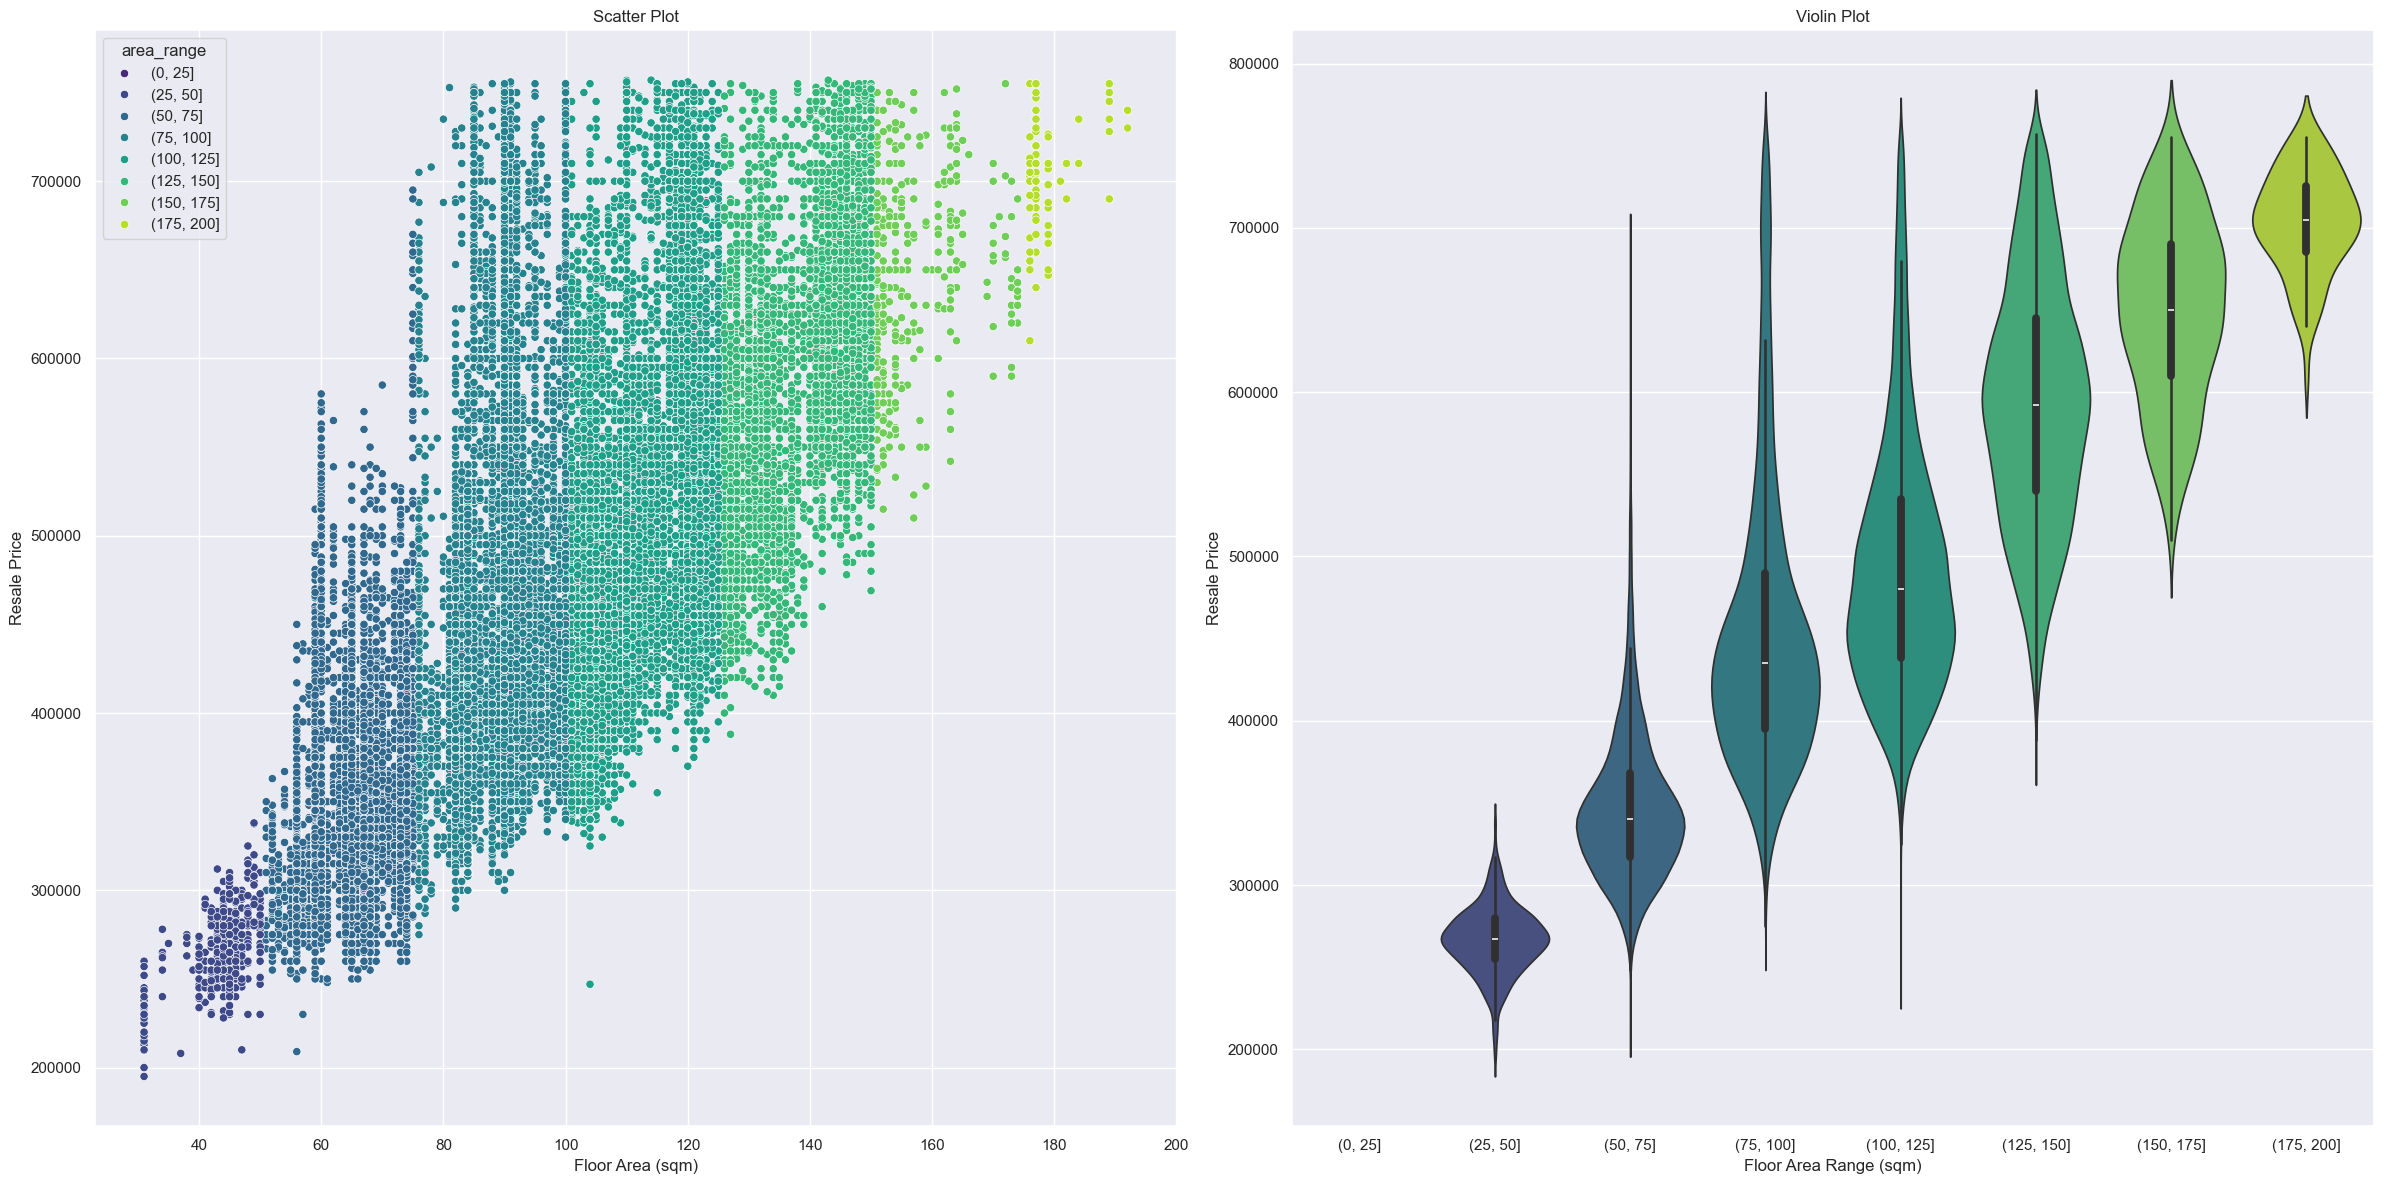

In [4]:
df = pd.DataFrame(data)
bins = [0, 25, 50, 75, 100, 125, 150, 175, 200] 
df['area_range'] = pd.cut(df['floor_area_sqm'], bins)
# Plot
plt.figure(figsize=(24, 12))

# Scatter plot
plt.subplot(1, 2, 1)
sb.scatterplot(data=df, x='floor_area_sqm', y='resale_price', hue='area_range', palette='viridis')
plt.title('Scatter Plot')
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Resale Price')

# Violin plot
plt.subplot(1, 2, 2)
sb.violinplot(data=df, x='area_range', y='resale_price', palette='viridis')
plt.title('Violin Plot')
plt.xlabel('Floor Area Range (sqm)')
plt.ylabel('Resale Price')

plt.tight_layout()
plt.show()

### Plotting Bar plot for Floor Area (sqm) against Average Resale Price

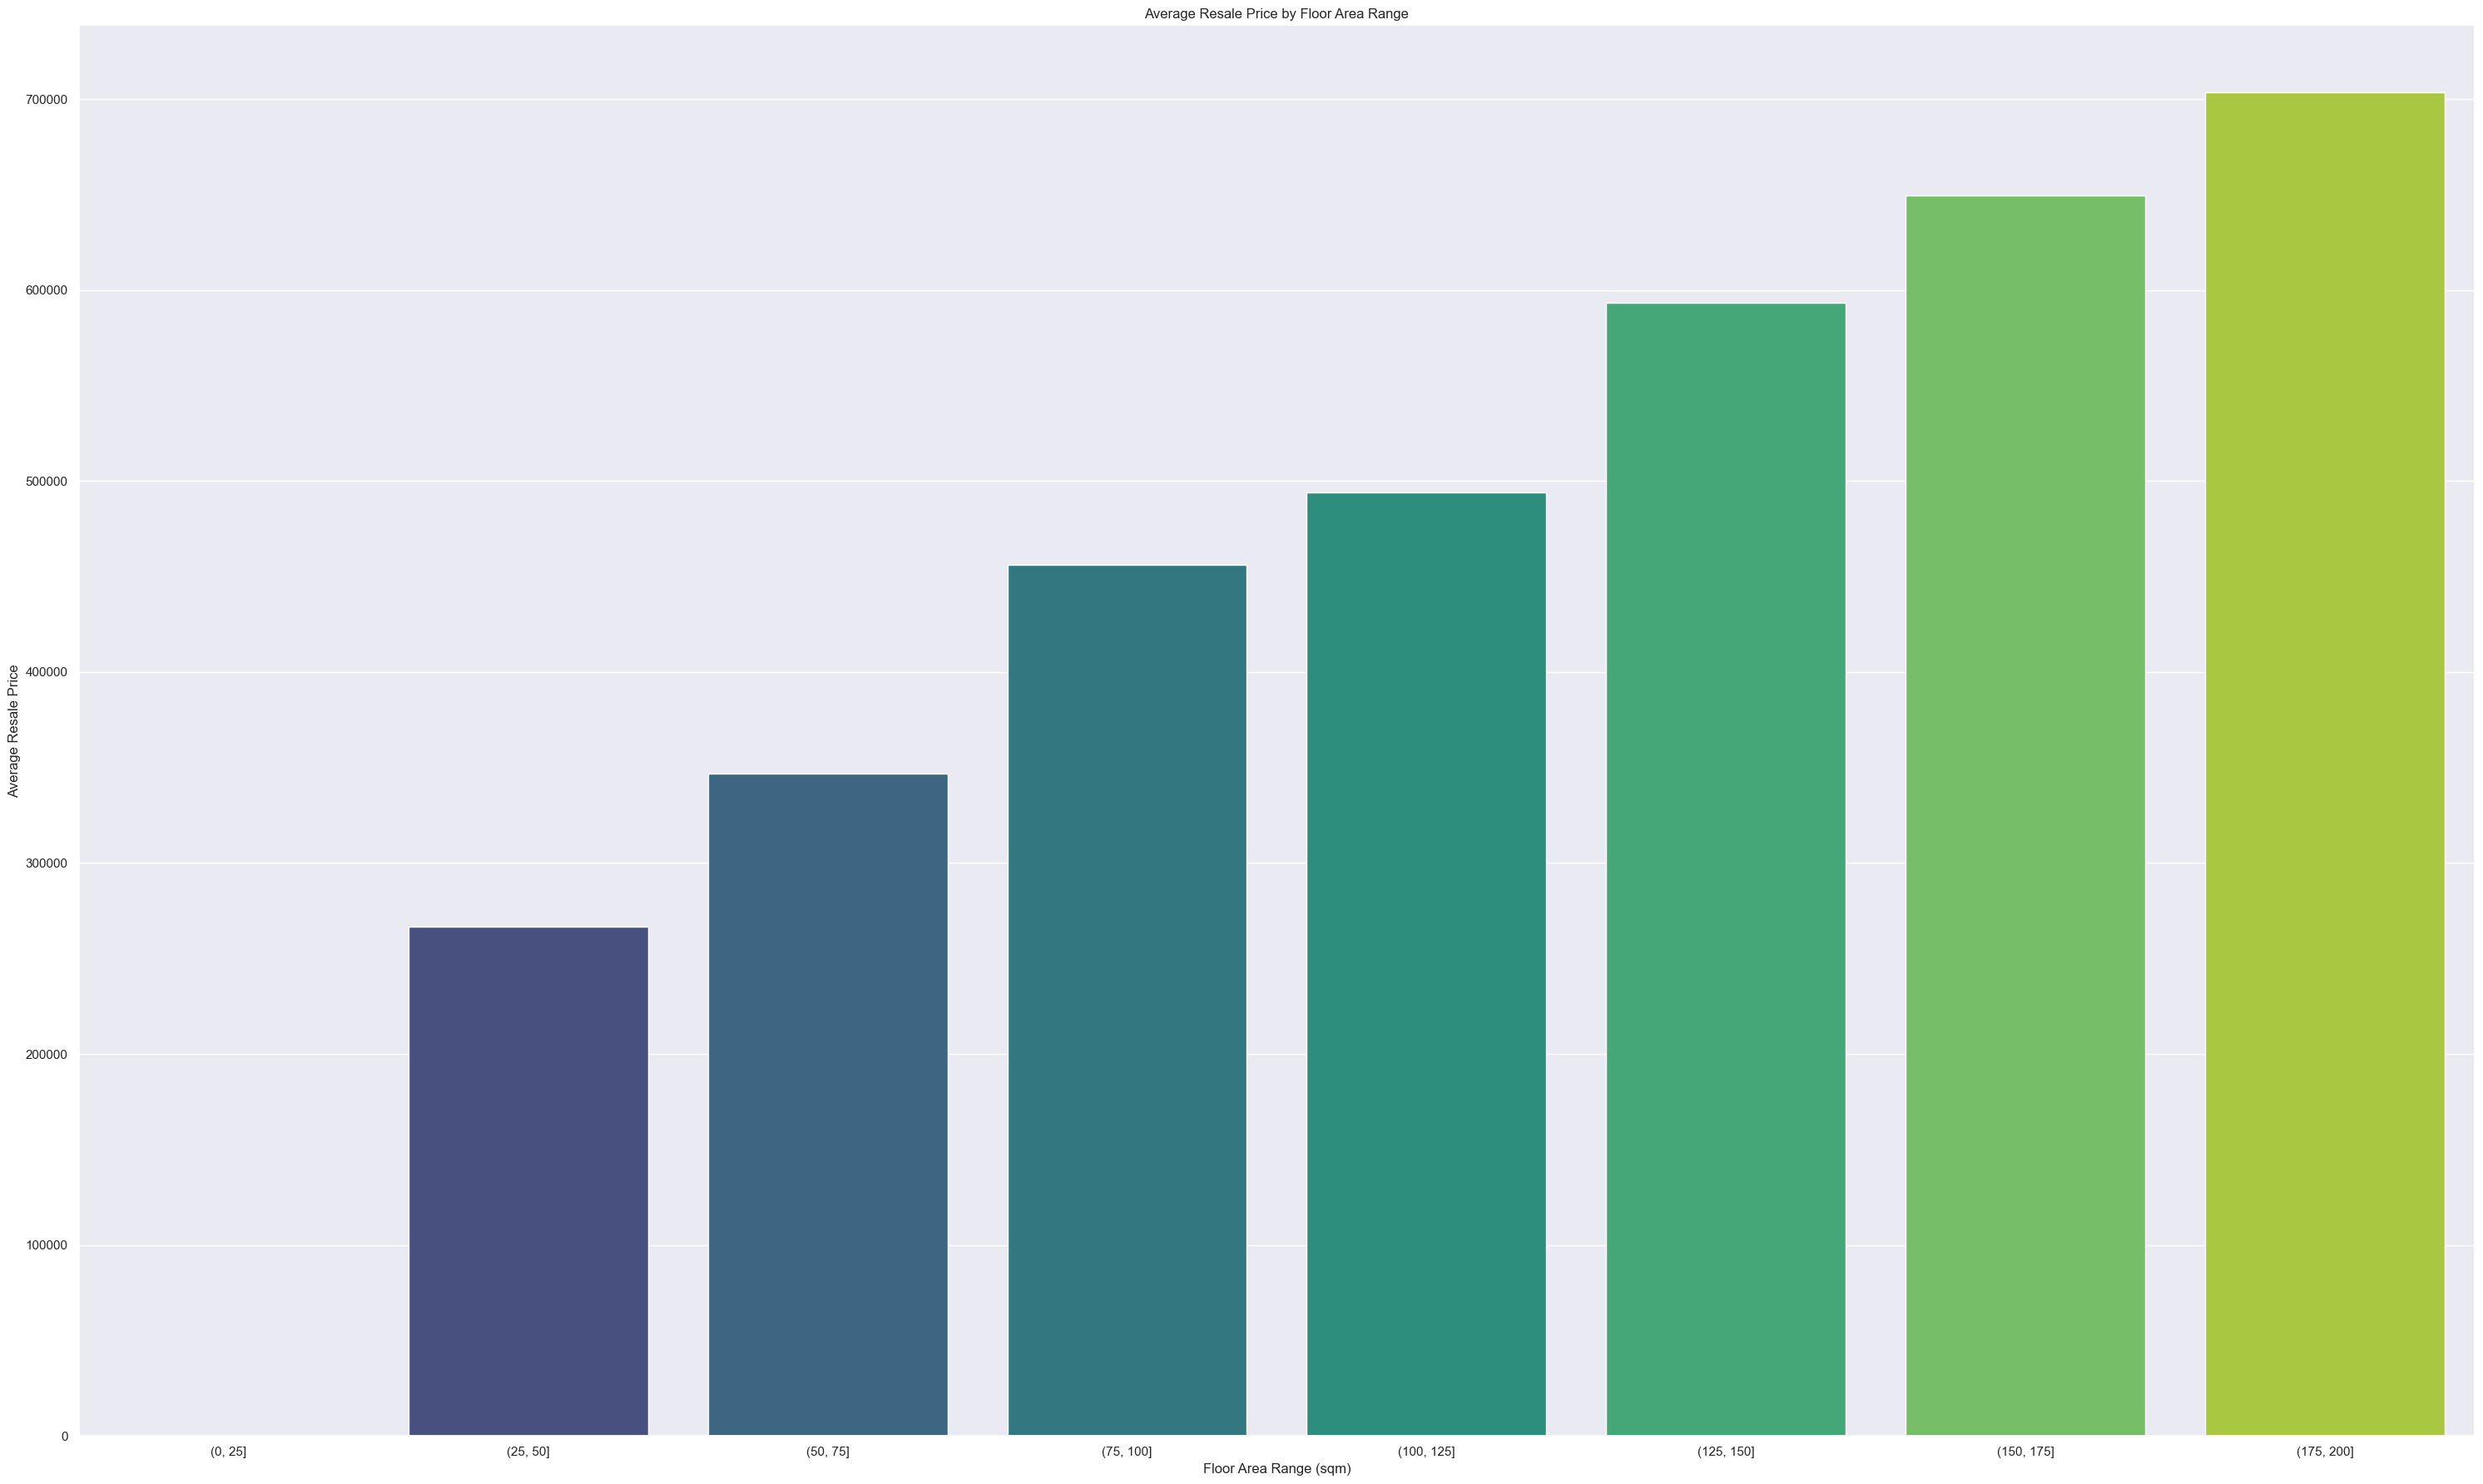

In [5]:
avg_prices = df.groupby('area_range')['resale_price'].mean().reset_index()
plt.figure(figsize=(30, 18))

# Bar plot
sb.barplot(data=avg_prices, x='area_range', y='resale_price', palette='viridis')
plt.title('Average Resale Price by Floor Area Range')
plt.xlabel('Floor Area Range (sqm)')
plt.ylabel('Average Resale Price')

plt.tight_layout()
plt.show()

### Visualising Average Resale Price over time

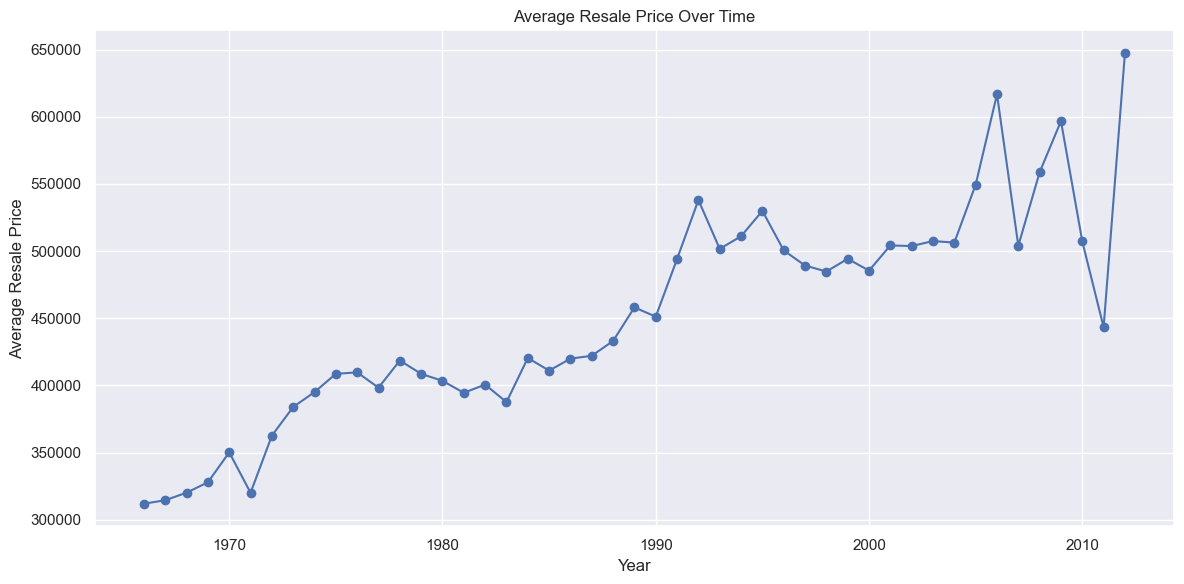

In [6]:
# Create DataFrame
df = pd.DataFrame(data)

# Convert lease_commence_date to datetime
df['lease_commence_date'] = pd.to_datetime(df['lease_commence_date'], format='ISO8601')

# Extract year from lease_commence_date
df['year'] = df['lease_commence_date'].dt.year

# Calculate the average resale price for each year
avg_prices = df.groupby('year')['resale_price'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))

# Plot the trend line
plt.plot(avg_prices['year'], avg_prices['resale_price'], marker='o', linestyle='-')
plt.title('Average Resale Price Over Time')
plt.xlabel('Year')
plt.ylabel('Average Resale Price')

plt.tight_layout()
plt.show()

### Heatmap to study the correaltion between 'floor_area_sqm', 'lease_commence_date', 'year', and 'resale_price'

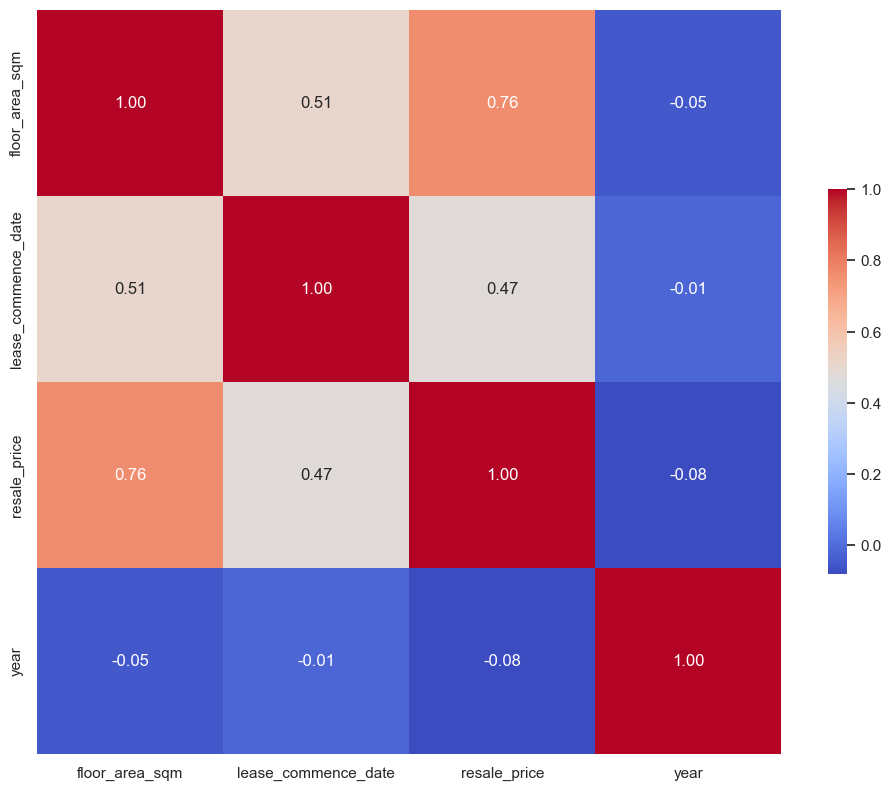

In [7]:
# Remove any columns that are unnamed
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
# Exclude non-numeric columns and calculate the correlation matrix
numeric_data = data.select_dtypes(include=[np.number])  # This will select only the numeric columns
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 10))

sb.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .5})

plt.show()